In [32]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [33]:
import zipfile

with zipfile.ZipFile('archive (5).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [34]:
import splitfolders
splitfolders.ratio(
    "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="output",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 12446 files [02:44, 75.55 files/s]


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD,Adam
import tensorflow as tf
import seaborn as sns
import os
import glob

In [36]:
os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']

In [37]:
os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['Cyst', 'Normal', 'Stone', 'Tumor']

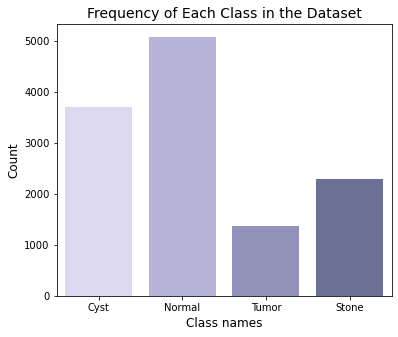

In [38]:
class_names = ['Cyst', 'Normal', 'Tumor', 'Stone'] 

cyst = len(os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst'))
normal = len(os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal'))
stone = len(os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone'))
tumor = len(os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor'))
images = [cyst, normal, stone, tumor]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette(start=2.8, rot=.1))
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()

In [39]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [40]:
train_dataset = train_datagen.flow_from_directory('output/train',
                                                  target_size=(90, 90),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=64,
                                                  )

test_dataset = test_datagen.flow_from_directory('output/test',
                                                target_size=(90, 90),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=64,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('output/val',
                                                  target_size=(90, 90),
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  color_mode='grayscale',
                                                  )

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [41]:
model = keras.Sequential()

In [42]:
#Block 1
model.add(Conv2D(64,kernel_size=(3,3), padding="same",activation="relu",input_shape=train_dataset.image_shape))
model.add(Conv2D(64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

In [43]:
#Block 2
model.add(Conv2D(128,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

In [44]:
#Block 3
model.add(Conv2D(256,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

In [45]:
#block 4
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

In [46]:
#Block 5
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

In [47]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [48]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Tripti Mishra\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 90, 90, 64)        640       
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 45, 45, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                  

In [50]:
model_fit = model.fit(train_dataset,
                      validation_data=valid_dataset,
                      steps_per_epoch = 20,
                      epochs = 40)


Epoch 1/40
20/20 [==============================] - 191s 9s/step - loss: 1.2863 - accuracy: 0.4203 - val_loss: 1.2470 - val_accuracy: 0.4082
Epoch 2/40
20/20 [==============================] - 166s 8s/step - loss: 1.2278 - accuracy: 0.4117 - val_loss: 1.1363 - val_accuracy: 0.4670
Epoch 3/40
20/20 [==============================] - 162s 8s/step - loss: 1.0100 - accuracy: 0.6383 - val_loss: 0.9773 - val_accuracy: 0.6264
Epoch 4/40
20/20 [==============================] - 159s 8s/step - loss: 0.9197 - accuracy: 0.6445 - val_loss: 0.8466 - val_accuracy: 0.6916
Epoch 5/40
20/20 [==============================] - 154s 8s/step - loss: 0.8363 - accuracy: 0.6945 - val_loss: 0.8012 - val_accuracy: 0.6940
Epoch 6/40
20/20 [==============================] - 154s 8s/step - loss: 0.7704 - accuracy: 0.7258 - val_loss: 0.7568 - val_accuracy: 0.6812
Epoch 7/40
20/20 [==============================] - 154s 8s/step - loss: 0.8497 - accuracy: 0.6578 - val_loss: 0.8210 - val_accuracy: 0.6924
Epoch 8/40
20

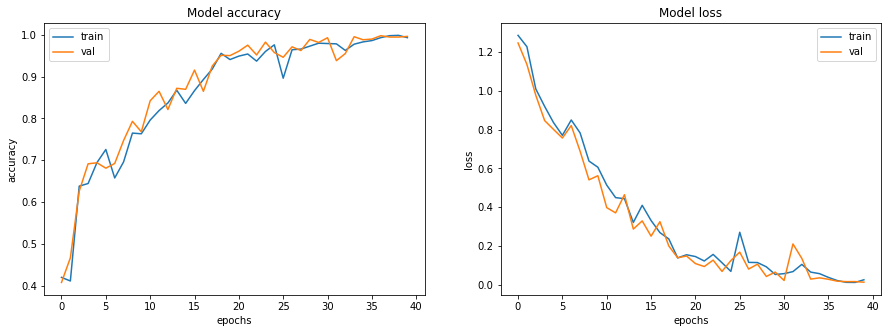

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate([ 'accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [71]:
pred = model.predict(test_dataset)

20/20 [==============================] - 20s 968ms/step


In [72]:
model.evaluate_generator(test_dataset)

C:\Users\Tripti Mishra\AppData\Local\Temp\ipykernel_34708\2046277562.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_dataset)


[0.017364710569381714, 0.9927942156791687]

In [73]:
y_pred = np.argmax(pred, axis = 1)
y_pred

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [74]:
y_true = test_dataset.classes

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[372,   0,   0,   0],
       [  0, 508,   0,   1],
       [  3,   5, 131,   0],
       [  0,   0,   0, 229]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       372
           1       0.99      1.00      0.99       509
           2       1.00      0.94      0.97       139
           3       1.00      1.00      1.00       229

    accuracy                           0.99      1249
   macro avg       0.99      0.99      0.99      1249
weighted avg       0.99      0.99      0.99      1249



In [77]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
 diseases_labels.append(key)

In [87]:
def evaluate(actual, pred):
  pre = []
  for i in pred:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

 

  fig, ax = plt.subplots(figsize=(10,8))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="BuPu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9927942353883107


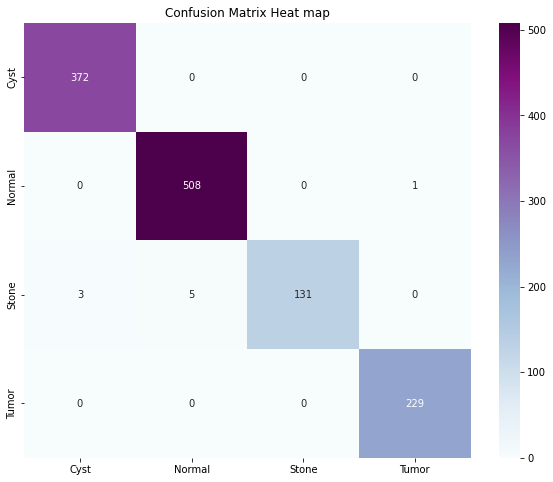

In [88]:
evaluate(test_dataset.classes,pred)